# morar

morar is a python package for working with tabular phenotypic screening data.

### Example data

This example data only has untreated (DMSO control) Cellprofiler measurements for three cell-lines (CPAP53, FLO1 & KYSE30).

In [1]:
import os
import pandas as pd
import numpy as np
import morar
import matplotlib.pyplot as plt
%matplotlib inline

# load in example single cell data
data = pd.read_csv("/home/scott/Dropbox/single_cell_example_data.csv")
n_rows, n_cols = data.shape
print("{} rows \n{} columns".format(n_rows, n_cols))
data.head()

3115 rows 
175 columns


,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,...,Nuclei_Intensity_MaxIntensityEdge_W1,Nuclei_Intensity_MaxIntensity_W1,Nuclei_Intensity_MeanIntensityEdge_W1,Nuclei_Intensity_MeanIntensity_W1,Nuclei_Intensity_MedianIntensity_W1,Nuclei_Intensity_MinIntensityEdge_W1,Nuclei_Intensity_MinIntensity_W1,Nuclei_Intensity_StdIntensityEdge_W1,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1
0,DMSO,0,CPAP53,6119,1,A01,7313,1.452288,0.859793,0.541102,...,0.046601,0.146944,0.035183,0.090561,0.099413,0.025620,0.025620,0.005066,0.030142,0.113756
1,DMSO,0,CPAP53,6119,1,A01,6723,1.045362,0.542282,0.673377,...,0.035859,0.171115,0.022758,0.094423,0.106592,0.017548,0.017548,0.003269,0.045302,0.133967
2,DMSO,0,CPAP53,6119,1,A01,2545,1.567167,0.859639,0.398216,...,0.109331,0.189944,0.054827,0.105230,0.108217,0.038651,0.038651,0.016095,0.035619,0.129328
3,DMSO,0,CPAP53,6119,1,A01,5248,2.244958,0.968322,0.711207,...,0.029175,0.164858,0.021538,0.087355,0.095712,0.017075,0.017075,0.002364,0.043820,0.125116
4,DMSO,0,CPAP53,6119,1,A01,6290,1.227357,0.794636,0.555850,...,0.107851,0.219272,0.052124,0.127815,0.138277,0.036500,0.036500,0.015603,0.046839,0.166781


## The ~~pandas~~ morar DataFrame

### featuredata and metadata

Just like a pandas DataFrame, with a few extras. The main difference is the distinction of featuredata and metadata columns within the dataframe, and a number of methods such as aggregation, scaling and normalisation that need this distinction.

In [2]:
data = morar.DataFrame(data)

To get the names of the featuredata columns:

In [3]:
data.featurecols[:10] # first 10

['Cells_AreaShape_Area',
 'Cells_AreaShape_Compactness',
 'Cells_AreaShape_Eccentricity',
 'Cells_AreaShape_Extent',
 'Cells_AreaShape_FormFactor',
 'Cells_AreaShape_MajorAxisLength',
 'Cells_AreaShape_MaxFeretDiameter',
 'Cells_AreaShape_MaximumRadius',
 'Cells_AreaShape_MeanRadius',
 'Cells_AreaShape_MedianRadius']

To get the actual featuredata:

In [4]:
data.featuredata.head()

,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,Cells_AreaShape_MaximumRadius,Cells_AreaShape_MeanRadius,Cells_AreaShape_MedianRadius,...,Nuclei_Intensity_MaxIntensityEdge_W1,Nuclei_Intensity_MaxIntensity_W1,Nuclei_Intensity_MeanIntensityEdge_W1,Nuclei_Intensity_MeanIntensity_W1,Nuclei_Intensity_MedianIntensity_W1,Nuclei_Intensity_MinIntensityEdge_W1,Nuclei_Intensity_MinIntensity_W1,Nuclei_Intensity_StdIntensityEdge_W1,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1
0,7313,1.452288,0.859793,0.541102,0.400085,146.210894,165.411608,35.057096,12.083201,10.440307,...,0.046601,0.146944,0.035183,0.090561,0.099413,0.025620,0.025620,0.005066,0.030142,0.113756
1,6723,1.045362,0.542282,0.673377,0.687665,102.271033,107.837841,41.000000,14.219288,12.649111,...,0.035859,0.171115,0.022758,0.094423,0.106592,0.017548,0.017548,0.003269,0.045302,0.133967
2,2545,1.567167,0.859639,0.398216,0.406467,89.634503,97.637083,18.027756,6.673246,6.000000,...,0.109331,0.189944,0.054827,0.105230,0.108217,0.038651,0.038651,0.016095,0.035619,0.129328
3,5248,2.244958,0.968322,0.711207,0.402723,167.740973,157.003185,22.000000,8.529908,8.000000,...,0.029175,0.164858,0.021538,0.087355,0.095712,0.017075,0.017075,0.002364,0.043820,0.125116
4,6290,1.227357,0.794636,0.555850,0.446626,119.665209,122.102416,32.000000,11.435842,10.000000,...,0.107851,0.219272,0.052124,0.127815,0.138277,0.036500,0.036500,0.015603,0.046839,0.166781


The same works with metadata...

In [5]:
data.metacols

['Metadata_compound',
 'Metadata_concentration',
 'Metadata_platename',
 'Metadata_platenum',
 'Metadata_site',
 'Metadata_well']

By default any column that begins with "`Metadata_`" is metadata, and everything else is classed as featuredata.

-----------------

## Aggregation

At the moment the example data is at the single cell level, with a row per cell. Most of the time we want to aggregate this down to an image or well average.

As we only have three wells (A01 for three plates), we should get a row per DMSO treatment for each cell-line.

In [6]:
data.agg(on="Metadata_platename")

,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,...,Nuclei_Intensity_MaxIntensityEdge_W1,Nuclei_Intensity_MaxIntensity_W1,Nuclei_Intensity_MeanIntensityEdge_W1,Nuclei_Intensity_MeanIntensity_W1,Nuclei_Intensity_MedianIntensity_W1,Nuclei_Intensity_MinIntensityEdge_W1,Nuclei_Intensity_MinIntensity_W1,Nuclei_Intensity_StdIntensityEdge_W1,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1
0,DMSO,0,CPAP53,6119,1,A01,6659.5,1.401312,0.849465,0.514216,...,0.052392,0.179820,0.036169,0.107214,0.116831,0.026741,0.026741,0.005556,0.039872,0.136389
1,DMSO,0,FLO1,6116,1,A01,7297.0,1.180151,0.744776,0.566198,...,0.073434,0.317884,0.050400,0.167128,0.172324,0.035851,0.035851,0.007712,0.069057,0.221981
2,DMSO,0,KYSE30,6114,1,A01,5910.0,1.352440,0.806265,0.513757,...,0.011398,0.012161,0.009667,0.009799,0.009766,0.008148,0.007935,0.000497,0.000534,0.010147


We can aggregate on multiple columns by passing a list such as `["Metadata_well", "Metadata_platename"]`.

We can also choose to average by a median (default) or median, with the `method` argument.

In [7]:
data.agg(on="Metadata_platename", method="mean")

,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,...,Nuclei_Intensity_MaxIntensityEdge_W1,Nuclei_Intensity_MaxIntensity_W1,Nuclei_Intensity_MeanIntensityEdge_W1,Nuclei_Intensity_MeanIntensity_W1,Nuclei_Intensity_MedianIntensity_W1,Nuclei_Intensity_MinIntensityEdge_W1,Nuclei_Intensity_MinIntensity_W1,Nuclei_Intensity_StdIntensityEdge_W1,Nuclei_Intensity_StdIntensity_W1,Nuclei_Intensity_UpperQuartileIntensity_W1
0,DMSO,0,CPAP53,6119,1,A01,6924.574271,1.658188,0.812143,0.500624,...,0.052693,0.178927,0.035780,0.102651,0.111341,0.025760,0.025755,0.005930,0.040513,0.134633
1,DMSO,0,FLO1,6116,1,A01,8380.209003,1.250192,0.721066,0.577295,...,0.085844,0.327951,0.051686,0.168493,0.172363,0.036072,0.036071,0.011810,0.074594,0.227802
2,DMSO,0,KYSE30,6114,1,A01,10470.664175,1.484766,0.770031,0.513447,...,0.013575,0.015417,0.011248,0.011733,0.011744,0.009092,0.008876,0.000881,0.001034,0.012416


## Normalising

To remove batch effects, such as different staining intensities per plate, or to compare treatment effects across cell-lines we have to normalise the data.

We can do this with the `.normalise()` method, which subtracts the negative control values per plate from each feature.

It takes the arguments:
- `plate_id`, which is the column containing the label for each plate.
- `neg_compound`, name of the negative control compound (default = "DMSO")
- `compound`, name of the column containing compound names (default = "Metadata_compound"

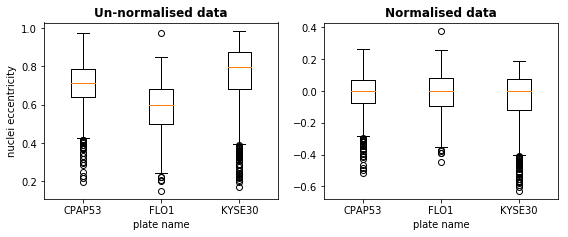

In [8]:
# function to plot nuclei eccentricity per plate
def norm_plot(dat, title):
    names, vals = [], []
    grouping = dat.groupby("Metadata_platename")
    for name, group in grouping:
        tmp = group.Nuclei_AreaShape_Eccentricity.values.tolist()
        vals.append(tmp)
        names.append(name)

    plt.boxplot(vals)
    plt.xticks(range(1, len(names)+1), names)
    plt.xlabel("plate name")
    plt.title(title, fontweight="bold")
    


plt.figure(figsize=[8,6])

plt.subplot(221)
norm_plot(data, "Un-normalised data")
plt.ylabel("nuclei eccentricity")

plt.subplot(222)

# normalise data per plate (cell-line)
data_norm = data.normalise(plate_id="Metadata_platename")

norm_plot(data_norm, "Normalised data")

plt.tight_layout()
plt.show()

## Feature scaling

Many of the feature measurements are in very different scales. For instance cells area is measured in pixels and might have values in the thousands, whereas eccentricity is bound between 0 and 1.  

This might interfere with downstream methods, so it's typical to scale all the feature values to 0 with unit variance with a z score.

We can do this with the `.scale_features()` method.

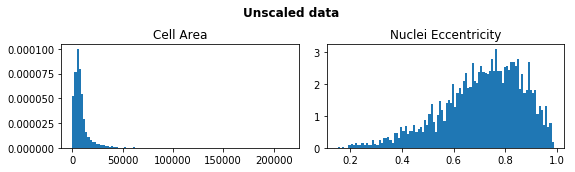

In [9]:
# function to make plots
def scale_plot(dat, title):
    """make a plot of cell-area and nuclei-eccentricity"""
    plt.figure(figsize=[8, 4])
    plt.subplot(221)
    plt.title("Cell Area")
    plt.hist(dat["Cells_AreaShape_Area"], bins=100, normed=1)

    plt.subplot(222)
    plt.title("Nuclei Eccentricity")
    plt.hist(dat["Nuclei_AreaShape_Eccentricity"], bins=100, normed=1)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.suptitle(title, fontweight="bold")
    plt.show()
    

    
scale_plot(data, "Unscaled data")

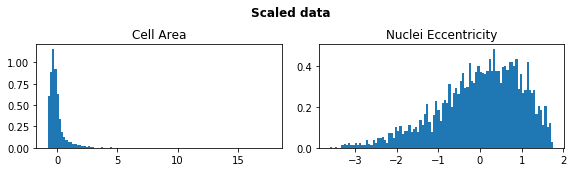

In [10]:
data_scaled = data.scale_features()

scale_plot(data_scaled, "Scaled data")

In [11]:
area_mean = data_scaled.Cells_AreaShape_Area.mean()
area_std = data_scaled.Cells_AreaShape_Area.std()
print("mean = {:.2f}\n\
standard deviation = {:.2f}".format(area_mean, area_std))

mean = -0.00
standard deviation = 1.00


## Principal components

Since calcualting the principal components of a dataset is such a common operation, there is a `.pca()` method for morar dataframes.

This returns a dataframe of principal components with the associated metadata, as well as the explained variance.

In [12]:
# first remove missing data, can't have NaN values in the PCA calculation
missing = data_scaled.isnull().sum()
data_scaled = data_scaled.drop(missing[missing > 0].index, axis=1)

pca_df, pca_var = data_scaled.pca()

In [13]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC160,PC161,PC162,PC163,Metadata_compound,Metadata_concentration,Metadata_platename,Metadata_platenum,Metadata_site,Metadata_well
0,0.892394,-5.027810,1.848411,-0.844165,0.453647,0.111056,0.509544,-1.760124,1.689087,3.040456,...,-0.000450,0.002858,-0.003976,0.002758,DMSO,0,CPAP53,6119,1,A01
1,1.532934,-5.931854,2.057423,-2.275006,0.930320,0.783315,1.259424,1.488056,-0.534312,1.826376,...,0.001523,-0.002552,0.000463,-0.003439,DMSO,0,CPAP53,6119,1,A01
2,4.913065,-2.134422,-2.722417,5.353066,-1.349470,2.371191,-0.451264,-1.268996,-4.387346,-0.169706,...,-0.003100,-0.002865,-0.001382,-0.003420,DMSO,0,CPAP53,6119,1,A01
3,0.924419,-6.267590,1.299768,1.443804,0.443817,-2.715458,3.595639,-0.919689,0.265012,0.140926,...,0.001229,0.009523,-0.001668,-0.000444,DMSO,0,CPAP53,6119,1,A01
4,6.063763,-2.678332,0.144865,2.995934,-0.326641,2.347589,0.425272,-3.152036,-3.636349,-1.353622,...,-0.003887,-0.012992,0.002697,0.006550,DMSO,0,CPAP53,6119,1,A01


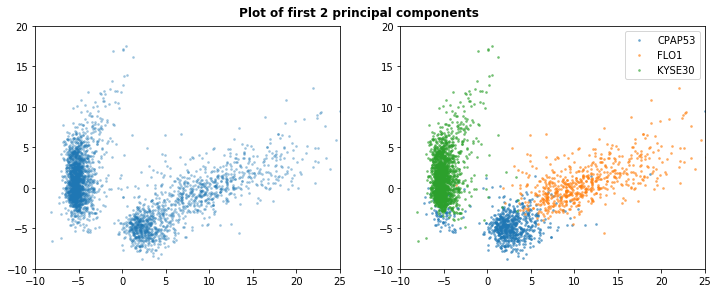

In [14]:
# plot the calculated principal components
plt.figure(figsize=[12, 9])
plt.suptitle("Plot of first 2 principal components", fontweight="bold")
plt.subplot(221)
plt.scatter(pca_df.PC1, pca_df.PC2, s=3, alpha=0.3)
plt.xlim([-10, 25]); plt.ylim([-10, 20])
plt.subplot(222)
for name, group in pca_df.groupby("Metadata_platename"):
    plt.scatter(group.PC1, group.PC2, label=name, s=3, alpha=0.5)
plt.xlim([-10, 25]); plt.ylim([-10, 20])
plt.legend()
plt.subplots_adjust(top=0.95)
plt.show()

### Variance explained by principal components

This is often useful for calculated how many principal components to use.

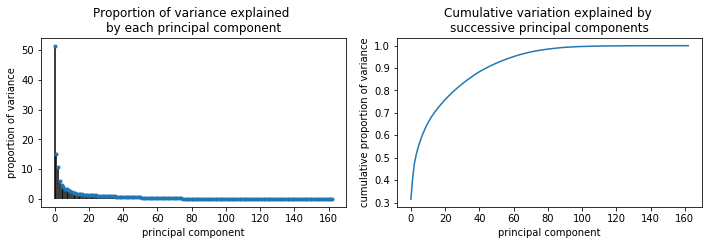

In [15]:
plt.figure(figsize=[10, 6])
plt.subplot(221)
plt.plot(pca_var, ".")
plt.vlines(x=range(len(pca_var)), ymin=0, ymax=pca_var)
plt.ylabel("proportion of variance")
plt.xlabel("principal component")
plt.title("Proportion of variance explained \nby each principal component")

plt.subplot(222)
cumulative_var = np.cumsum(pca_var) / np.sum(pca_var)
plt.plot(cumulative_var)
plt.title("Cumulative variation explained by \nsuccessive principal components")
plt.xlabel("principal component")
plt.ylabel("cumulative proportion of variance")
plt.tight_layout()
plt.show()

To find out how many principal components are needed to account for a certain proportion of variance within the data:

In [16]:
wanted_proportion = 0.8
# returns the first index of where `cumulative_var` exceeds or equals the wanted_proportion
# as False == 1
np.argmax(cumulative_var >= wanted_proportion) + 1 # as zero indexed

27

Although the ability to pre-select the number of principal components based on explained variance in the data is built into the `.pca()` method.

If we pass `n_components` argument, we can either specify an integer which will return that many principal components, or a float < 0, which will return the number of principal components to statisfy that proportion of variance.

By default it will return all the principal components.

In [17]:
pca_df2, pca_var2 = data_scaled.pca(n_components=0.8)
pca_df2.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27',
       'Metadata_compound', 'Metadata_concentration', 'Metadata_platename',
       'Metadata_platenum', 'Metadata_site', 'Metadata_well'],
      dtype='object')

## Feature selection

Rather than principal components to reduce dimensionality, one option is to remove features that are not providing any useful information.

One method to do this is to find redundant features, for example those that are highly correlated with other features. morar has the `find_correlation()` function that returns column names that should be removed.

In [18]:
from morar import feature_selection

# find one of pairs of features that have a correlation > 0.95
features_to_rm = feature_selection.find_correlation(data_scaled, threshold=0.95)

features_to_rm

['Cells_AreaShape_MedianRadius',
 'Cells_AreaShape_MaximumRadius',
 'Cells_Intensity_IntegratedIntensity_W2',
 'Cells_Intensity_LowerQuartileIntensity_W2',
 'Cells_Intensity_LowerQuartileIntensity_W3',
 'Cells_Intensity_MedianIntensity_W2',
 'Cells_Intensity_MedianIntensity_W4',
 'Cells_Intensity_LowerQuartileIntensity_W4',
 'Cells_Intensity_UpperQuartileIntensity_W2',
 'Cells_Intensity_MADIntensity_W2',
 'Cells_Intensity_UpperQuartileIntensity_W3',
 'Cells_Intensity_MADIntensity_W3',
 'Cells_Intensity_MADIntensity_W5',
 'Cells_Intensity_MassDisplacement_W5',
 'Cells_Intensity_MassDisplacement_W3',
 'Cells_Intensity_MaxIntensityEdge_W2',
 'Cells_Intensity_MaxIntensityEdge_W3',
 'Cells_Intensity_MaxIntensityEdge_W4',
 'Cells_Intensity_MaxIntensityEdge_W5',
 'Cells_Intensity_MaxIntensity_W3',
 'Cells_Intensity_MaxIntensity_W4',
 'Cells_Intensity_MaxIntensity_W5',
 'Cells_Intensity_MeanIntensityEdge_W2',
 'Cells_Intensity_UpperQuartileIntensity_W3',
 'Cells_Intensity_MeanIntensity_W3',
 '

In [19]:
# remove features
data_scaled = data_scaled.drop(features_to_rm, axis=1)